# Worksheet 02

Name: Stone Harris
UID: U41533031

### Topics

- Effective Programming

### Effective Programming

a) What is a drawback of the top down approach?

A drawback would be that it could be not flexible enough to deal with unforeseen design problems that come up later in the development process. It can also result in a ton of time spent on planning and designing systems that will need huge changes once the implementation begins and more issues come up.

b) What is a drawback of the bottom up approach?

The main drawback would be that, without a clear initial design or end goal, it may lead to integration issues when combining these components. There may also be a lack of vision for the big picture system architecture, which can yield redundancies or inconsistencies in the design.

c) What are 3 things you can do to have a better debugging experience?

3 things you can go:
- Use a Debugger
- Write Unit Tests
- Implement Logging

d) (Optional) Follow along with the live coding. You can write your code here:

## Exercise

This exercise will use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data). Download the file named `train.csv` and place it in the same folder as this notebook.

The goal of this exercise is to practice using [pandas](https://pypi.org/project/pandas/) methods. If your:

1. code is taking a long time to run
2. code involves for loops or while loops
3. code spans multiple lines

look through the pandas documentation for alternatives. This [cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) may come in handy.

a) Complete the code below to read in a filepath to the `train.csv` and returns the DataFrame.

In [2]:
import pandas as pd

df = pd.read_csv('train.csv')
df.describe()

/var/folders/g5/d39pv3x53dg1mmj0j73drzlw0000gn/T/ipykernel_67556/2432967943.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


b) Complete the code so it returns the number of rows that have at least one empty column value

In [3]:
import pandas as pd

df = pd.read_csv('train.csv')

num_rows_with_empty = df.isnull().any(axis=1).sum()

print("There are " +  str(num_rows_with_empty) + " rows with at least one empty value")

There are 708 rows with at least one empty value


c) Complete the code below to remove all columns with more than 200 NaN values

In [4]:
import pandas as pd

df = pd.read_csv('train.csv')

df = df.dropna(axis=1, thresh=df.shape[0] - 200)

print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


d) Complete the code below to replaces `male` with 0 and `female` with 1

In [8]:
import pandas as pd

df = pd.read_csv('train.csv')

df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1}).astype(int)

print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S  


/var/folders/g5/d39pv3x53dg1mmj0j73drzlw0000gn/T/ipykernel_67556/2786391059.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1}).astype(int)


e) Complete the code below to add four columns `First Name`, `Middle Name`, `Last Name`, and `Title` corresponding to the value in the `name` column.

For example: `Braund, Mr. Owen Harris` would be: 

|First Name | Middle Name | Last Name | Title |
|-----------|-------------|-----------|-------|
| Owen      |  Harris     |  Braund   | Mr    |

Anything not clearly one of the above 4 categories can be ignored.

In [11]:
# Split field 
name_parts = df['Name'].str.extract(r'(?P<LastName>[^,]+), (?P<Title>.+)\. (?P<FirstName>.+)')

# FirstName has both first + middle if it contains more than 1 word
name_parts[['FirstName', 'MiddleName']] = name_parts['FirstName'].str.split(' ', n=1, expand=True)

# Assigning
df['First Name'] = name_parts['FirstName']
df['Middle Name'] = name_parts['MiddleName']
df['Last Name'] = name_parts['LastName']
df['Title'] = name_parts['Title']

df[['First Name', 'Middle Name', 'Last Name', 'Title']].head()


,First Name,Middle Name,Last Name,Title
0,Owen,Harris,Braund,Mr
1,John,Bradley (Florence Briggs Thayer),Cumings,Mrs
2,Laina,None,Heikkinen,Miss
3,Jacques,Heath (Lily May Peel),Futrelle,Mrs
4,William,Henry,Allen,Mr


f) Complete the code below to replace all missing ages with the average age

In [14]:
# Calculate mean 
average_age = df['Age'].mean()
# print(average_age)

# Replace NaN vals with mean
df['Age'] = df['Age'].fillna(average_age)

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,First Name,Middle Name,Last Name,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Owen,Harris,Braund,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,John,Bradley (Florence Briggs Thayer),Cumings,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Laina,None,Heikkinen,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Jacques,Heath (Lily May Peel),Futrelle,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,William,Henry,Allen,Mr


g) Plot a bar chart of the average age of those that survived and did not survive. Briefly comment on what you observe.

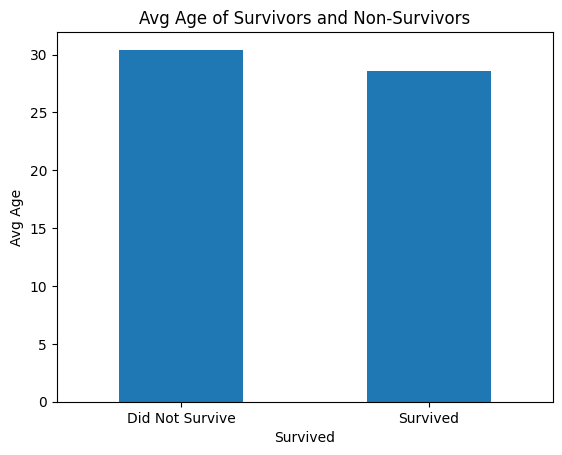

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

average_ages = df.groupby('Survived')['Age'].mean()

average_ages.plot(kind='bar')
plt.title('Avg Age of Survivors and Non-Survivors')
plt.xlabel('Survived')
plt.ylabel('Avg Age')
plt.xticks(ticks=[0, 1], labels=['Did Not Survive', 'Survived'], rotation=0)
plt.show()


It seems as though older people had a worse chance of surviving.